In [70]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import  networkx as nx


We look at 10 randomly selected SubReddit groups with the following IDS:

|	subreddit	|	subreddit_id	|	unique authors
|	:----------------:	----------	:--------------:	------------------	-------------------:
|	InternetIsBeautiful	|	t5_2ul7u	|	15199
|	GetMotivated	|	t5_2rmfx	|	9833
|	UpliftingNews	|	t5_2u3ta	|	9705
|	tf2	|	t5_2qka0	|	9089
|	techsupport	|	t5_2qioo	|	10821
|	Minecraft	|	t5_2r05i	|	11254
|	iamverysmart	|	t5_2yuej	|	7274
|	unitedkingdom	|	t5_2qhqb	|	10944
|	Smite	|	t5_2stl8	|	9760
|	history	|	t5_2qh53	|	10078

We proceed to analyze the number of authors who have commented on more than 2 of the 10 subreddit groups. There are 1,052 authors which makes the data more managable. 

|	author	|	numb_subreddits	|
|	:--------------:	|	------------:	|
|	CCV21	|	3	|
|	I_Hate_Idiots_	|	3	|
|	GlennDrexler	|	3	|
|	Fausthor	|	3	|
|	-Stupendous-Man-	|	3	|
|	....	|	....	|
|	TotesMessenger	|	7	|
|	JoeBidenBot	|	7	|
|	autowikibot	|	7	|

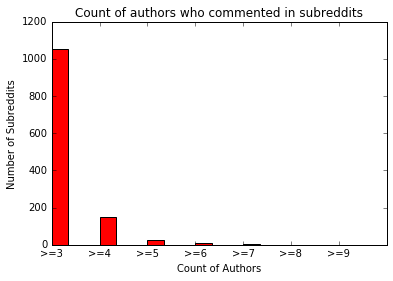

In [6]:
#Histogram:
count_of_subreddits = [3,4,5,6,7,8,9]    

N = 7
data =  [1052,147,27,8,5,0,0]
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, data, width, color='r')


# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Subreddits')

ax.set_xlabel('Count of Authors')
ax.set_title('Count of authors who commented in subreddits')
ax.set_xticklabels(('>=3', '>=4', '>=5', '>=6', '>=7','>=8','>=9'))
plt.show()



Next, we query to find out how many common subreddits authors have commented. (e.g. GlennDrexler and JoeBidenBot commented in Minecraft & techsupport). 

We constricted the data to authors > 3 subreddits. (So, we are analyzing the relationship of 150+ authors).

In [64]:
df = pd.read_csv('data/reddit_author_intersection.csv')
df_author_counts = pd.read_csv('data/reddit_author_count_subreddits.csv')

result = df.merge(df_author_counts, left_on='author1', right_on='author', how='outer')
result = df.merge(df_author_counts, left_on='author1', right_on='author', how='outer')
result2 = result.merge(df_author_counts, left_on='author2', right_on='author', how='outer')

df = result2.drop('author_x', 1)
df = df.drop('author_y', 1)
df.columns = ['author1','author2','intersection','numb_subreddits_author1','numb_subreddits_author2']
df['union']=df['numb_subreddits_author1']+df['numb_subreddits_author2']-df['intersection']
df['Jaccard Similarity'] = df['intersection']/df['union']

In [103]:
df_to_graph = pd.DataFrame(df,columns=['author1','author2','Jaccard Similarity'])
print df_to_graph


                   author1           author2  Jaccard Similarity
0        Dad_Jokes_Inbound  crysisnotaverted            0.333333
1              autowikibot  crysisnotaverted            0.375000
2              JoeBidenBot  crysisnotaverted            0.571429
3           Coffeechipmunk  crysisnotaverted            0.333333
4        LittleHelperRobot  crysisnotaverted            0.285714
5                  antdude  crysisnotaverted            0.285714
6      TweetsInCommentsBot  crysisnotaverted            0.571429
7        BHOP_TO_NEUROFUNK  crysisnotaverted            0.600000
8           TotesMessenger  crysisnotaverted            0.375000
9                [deleted]  crysisnotaverted            0.400000
10               Define_It  crysisnotaverted            0.428571
11               TrollaBot  crysisnotaverted            0.800000
12            GodKingThoth  crysisnotaverted            0.333333
13                -popgoes  crysisnotaverted            0.333333
14            TwoTailedFo

In [113]:
df_to_graph.fillna('unknown')

,author1,author2,Jaccard Similarity
0,Dad_Jokes_Inbound,crysisnotaverted,0.3333333
1,autowikibot,crysisnotaverted,0.375
2,JoeBidenBot,crysisnotaverted,0.5714286
3,Coffeechipmunk,crysisnotaverted,0.3333333
4,LittleHelperRobot,crysisnotaverted,0.2857143
5,antdude,crysisnotaverted,0.2857143
6,TweetsInCommentsBot,crysisnotaverted,0.5714286
7,BHOP_TO_NEUROFUNK,crysisnotaverted,0.6
8,TotesMessenger,crysisnotaverted,0.375
9,[deleted],crysisnotaverted,0.4


In [118]:
def add_edges_toGraph(graph,df):
    for i in range(df.shape[0]-10):
        node1 = df.get_value(i,'author1')
        node2 = df.get_value(i,'author2')
        weight = df.get_value(i,'Jaccard Similarity')
        graph.add_edge(node1,node2,weight = weight)
    return graph
    

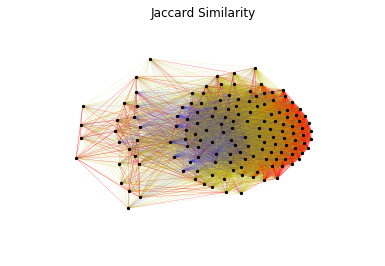

In [186]:
G = nx.Graph()

G = add_edges_toGraph(G,df_to_graph)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
emedium=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.33 and d['weight']<0.5]
emedium2=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.30 and d['weight']<=0.33]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.30]

pos=nx.spring_layout(G, iterations=1000) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=5,node_color='black')

# edges
e1= nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=.2,edge_color = 'r')
e2 = nx.draw_networkx_edges(G,pos,edgelist=emedium,
                    width=.15,alpha=0.5,edge_color='y')
e3 = nx.draw_networkx_edges(G,pos,edgelist=emedium2,
                    width=.1,edge_color = 'g')
e4 = nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=.05,alpha=0.5,edge_color='b')


# labels
#nx.draw_networkx_labels(G,pos,font_size=6,font_family='sans-serif')

plt.axis('off')
name= "Jaccard Similarity"
plt.title("%s" % name)
plt.savefig("results/%s_weighted_graph.pdf" % (name)) # save as png
plt.show() # display

